In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import datetime
import plotly.express as px

#old
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker


pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 400)
pd.set_option("display.max_colwidth", None) # None for all of it

In [8]:
dfpred = pd.read_csv("popbert_predictions.csv", header=None)

In [9]:
dfpred = dfpred.rename(columns={0:"sent_id", 1: "speech_id", 2:"elite", 3:"pplcenter", 4:"pleft", 5:"pright"}) 

In [10]:
print(dfpred.shape[0])
dfpred.head()

10830


,sent_id,speech_id,elite,pplcenter,pleft,pright
0,1539199,63255,0.777875,0.003340,0.011004,0.010842
1,945676,37018,0.005020,0.008902,0.006324,0.004043
2,945677,37018,0.004757,0.022558,0.005053,0.004308
3,945682,37018,0.010890,0.014177,0.007831,0.005050
4,1043211,41517,0.978646,0.028618,0.989022,0.028499


In [11]:
print("number of populist sentences:")
print(dfpred[(dfpred["elite"] > 0.41596) & (dfpred["pplcenter"] > 0.2954)].shape[0])

number of populist sentences:
33


In [13]:
ds = pd.read_feather("data/sentences_climate.feather")
print(ds.shape[0])
ds.head(2)

17015


,level_0,sent_id,speech_id,name,electoral_term,party,role,date,session,sentence_no,sentence_length,sentence
0,1048590,1539199,63255,Sebastian Brehm,19,CSU,mp,2021-03-04,215,24,13,"Für Sie gibt es keine Klimakrise, also wollen Sie alle diese Mehrkosten abschaffen."
1,655395,945676,37018,Ralph Lenkert,19,DIE LINKE,mp,2018-10-18,58,7,7,Für die Energiewende brauchen wir diese Anlagen.


In [16]:
df = dfpred.merge(ds, on="sent_id")

In [18]:
df.sample()

,sent_id,speech_id_x,elite,pplcenter,pleft,pright,level_0,speech_id_y,name,electoral_term,party,role,date,session,sentence_no,sentence_length,sentence
7287,1205769,48647,0.011403,0.005798,0.004484,0.00294,830633,48647,Katja Hessel,19,FDP,mp,2019-11-15,128,7,23,"Viele der Maßnahmen aus dem Klimaschutzpaket werden wir wieder mal einer gerichtlichen Überprüfung unterziehen, und das Bundesverfassungsgericht wird entscheiden, was wir hier tun."


In [23]:
df.groupby("party")[["elite", "pplcenter", "pleft", "pright"]].mean().sort_values(by="pright", ascending=False)

,elite,pplcenter,pleft,pright
party,,,,
AfD,0.378565,0.016890,0.056444,0.105646
DIE LINKE,0.197635,0.037661,0.074362,0.011758
FDP,0.129683,0.014645,0.020580,0.009960
GRUENE,0.206015,0.019395,0.035971,0.008963
CDU,0.053587,0.018265,0.009524,0.007621
SPD,0.055292,0.023349,0.012750,0.006576
CSU,0.033410,0.018741,0.006548,0.005535


In [24]:
dff = df[(df["elite"] > 0.41596)]
dff.shape

(1669, 17)

In [26]:
dff.groupby("party").elite.count().sort_values()

party
CSU           25
CDU           75
SPD           94
FDP          168
DIE LINKE    241
GRUENE       481
AfD          585
Name: elite, dtype: int64

In [28]:
dff.sentence.sample(50)

5802                                                                                                                                                Das Chaos, das Sie allein mit dem Klimapaket angerichtet haben, die schlampige Gesetzgebung, über die sich die gesamte Wirtschaft beschwert, sind das Gegenteil von zukunftsfähiger Politik.
2612                                                                                                                                                                                                                                                                      Trotzdem fehlt der Großen Koalition der Mut für wirksamen Klimaschutz.
6447                                                                                                                                                                                                                       Sie uns daher bitte in Zukunft mit Ihrer Klimahetze, mit Ihrem Gleichstellungswahn und Ihren Weltenrettungs

In [249]:
#kl.sort_values(by="elite").tail(300).groupby("party").elite.count().sort_values().tail(6)

party
SPD           13
CDU           18
FDP           27
DIE LINKE     38
GRUENE        59
AfD          127
Name: elite, dtype: int64

In [205]:
#kl.groupby("electoral_term").sentence.count()

electoral_term
19    1355
Name: sentence, dtype: int64

In [29]:
df[(df.party == "AfD") & (df.sentence.str.contains("grün|gruen", case=False))]["sentence"]

8                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Die grünen Gläubigen, die sich in allen Altparteien eingenistet haben, glauben bedingungslos dem IPCC, dem sogenannten UN-Weltklimarat.
73                                                                                                                                                                                                                                                                                                                                                              

In [250]:
kl.sentence

0                                                                                                                                                                                                          Es ist inakzeptabel, meine Damen und Herren, dass ein internationaler Konzern, der jahrzehntelang direkt und indirekt vom deutschen Staat, den Steuerzahlerinnen und Steuerzahlern dieser Republik und, nebenbei bemerkt, auch von denen der Europäischen Union profitiert hat, jetzt seine Mitarbeiterinnen und Mitarbeiter für krasse Managementfehler bluten lässt.
1                                                                                                                                                                                                                                                                                                                                                                                                                                               Sie is

In [191]:
kl["session_id"] = kl["session_id"].astype("int")
xy = kl.groupby("session_id").elite.count().sort_index().reset_index()


In [193]:
for x in range(19000,19210):
    if x not in xy.session_id.to_list():
        xy.loc[len(xy)] = [x,0]
xy=xy.sort_values(by="session_id")
xy.shape

(210, 2)

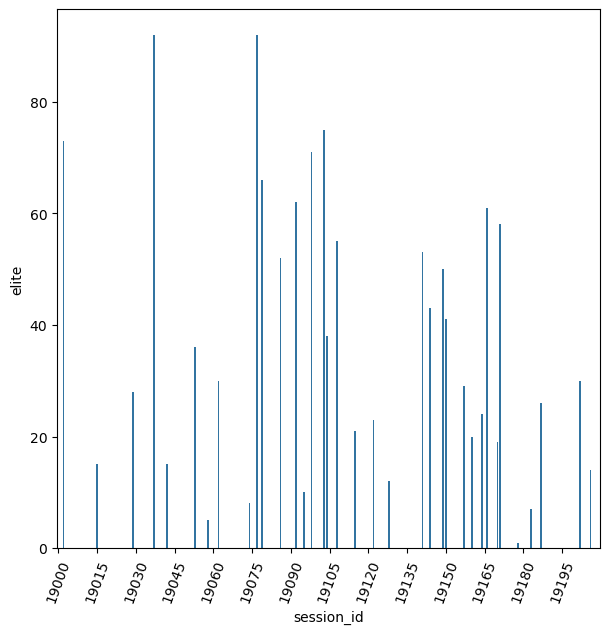

In [194]:
fig, ax = plt.subplots(figsize=(7, 7))
#interval = datetime.timedelta(days=30)
p = sns.barplot(xy, x="session_id", y="elite", gap=0.1, ax=ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.xticks(rotation=70)
plt.show()

In [70]:
#kl

In [71]:
[x for x in dir(dff) if x.startswith("sort")]

['sort_index', 'sort_values']

In [89]:
elite = kl[["elite", "pplcenter", "party", "session_id", "sentence", "electoral_term"]].sort_values(by="elite").tail(400)

In [90]:
elite.groupby("party")["elite"].count().sort_values()

party
Die PARTEI      1
CSU             4
LKR             9
parteilos       9
SPD            24
CDU            25
FDP            38
DIE LINKE      49
GRUENE         87
AfD           154
Name: elite, dtype: int64

In [80]:
elite.groupby("electoral_term")["sentence"].count().sort_values()

electoral_term
19    300
Name: sentence, dtype: int64

In [41]:
kl.head(1)

,sent_id,speech_id_x,elite,pplcenter,pleft,pright,speech_id_y,electoral_term,party,role,session_id,sentence_no,sentence_length,sentence
0,2107,141,0.954104,0.308506,0.984604,0.008438,141,19,SPD,mp,19002,9,46,"Es ist inakzeptabel, meine Damen und Herren, dass ein internationaler Konzern, der jahrzehntelang direkt und indirekt vom deutschen Staat, den Steuerzahlerinnen und Steuerzahlern dieser Republik und, nebenbei bemerkt, auch von denen der Europäischen Union profitiert hat, jetzt seine Mitarbeiterinnen und Mitarbeiter für krasse Managementfehler bluten lässt."


In [195]:
kl.groupby("party")["sentence"].count().sort_values()

party
Die PARTEI      3
LKR            12
parteilos      25
CSU            32
CDU            90
FDP           136
SPD           186
DIE LINKE     202
GRUENE        314
AfD           355
Name: sentence, dtype: int64

In [53]:
sentences = kl.sentence